# Canada Geese and Subspecies - Cleaning, Graphs, and Conclusions

Author: Bo Cheung

## Cleaning Datasets
First we want to clean the data of columns we wont use/need.
Next get rid of all the hard to work with data in this dataset. This is done using integer codes found in the CSV. They describe the date and precision of coordinates

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from GooseUtils import get_coord_unc

from IPython.display import HTML, Image


#Skipping bad lines as we only lose 5 columns out of 6mil entries- bad line as a result of an extra column
#NOTE!!! These links are direct downloads to the file, clicking them will download the files
"""https://www.sciencebase.gov/catalog/file/get/653fa806d34ee4b6e05bc57d?f=__disk__3e%2F93%2F14%2F3e9314e6fc046735f91cc3e78a9982b5f72d8c59"""
canada_geese_df = pd.read_csv("Bird_Banding_Data/NABBP_2023_grp_02.csv", on_bad_lines='skip', low_memory=False) 

"""https://www.sciencebase.gov/catalog/file/get/653fa806d34ee4b6e05bc57d?f=__disk__a5%2Faa%2F46%2Fa5aa46b4bba48273e9ab437e1ee5f7eed5a3aa3f"""
subspecies_df = pd.read_csv("Bird_Banding_Data/NABBP_2023_grp_03.csv", on_bad_lines='skip', low_memory=False)

subspecies_df = subspecies_df[(subspecies_df['SPECIES_ID'] == 1729) | (subspecies_df['SPECIES_ID'] == 1723)]

canada_geese_df = pd.concat([canada_geese_df, subspecies_df], ignore_index=True)

#Drop all columns that we most likely wont use in the future
canada_geese_df = canada_geese_df.drop(columns=['ISO_COUNTRY', 'ISO_SUBDIVISION', 'AGE_CODE', 'SEX_CODE', 'EXTRA_INFO',
 'HOW_OBTAINED', 'WHO_OBTAINED','REPORTING_METHOD', 'PRESENT_CONDITION', 'MIN_AGE_AT_ENC', 'PERMIT', 'RECORD_SOURCE', 
 'BAND_STATUS','BIRD_STATUS', 'BAND_TYPE'])


#Drop all Rows with coords in country / hard to work with percision codes
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'] != 72]
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'] != 33]
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'] != 38]
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'] != 28]
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'] != 18]
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'] != 8]
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'] != 12]
canada_geese_df = canada_geese_df[canada_geese_df['COORD_PREC'].notna()]

#Droping rows with missing months and years
canada_geese_df = canada_geese_df[(canada_geese_df['EVENT_MONTH'] < 13) & (canada_geese_df['EVENT_MONTH'] > 0)]
canada_geese_df = canada_geese_df[(canada_geese_df['EVENT_DAY'] < 32) & (canada_geese_df['EVENT_MONTH'] > 0)]

canada_geese_df['EVENT_DATE'] = pd.to_datetime(canada_geese_df['EVENT_DATE'], errors='coerce')

#Drop all na values in columns where we need them
canada_geese_df = canada_geese_df.dropna(subset=['LAT_DD', 'LON_DD','EVENT_DATE'])

canada_geese_df['COORD_UNC'] = canada_geese_df['COORD_PREC'].apply(get_coord_unc)

display(canada_geese_df)

,RECORD_ID,EVENT_TYPE,BAND,ORIGINAL_BAND,OTHER_BANDS,EVENT_DATE,EVENT_DAY,EVENT_MONTH,EVENT_YEAR,SPECIES_ID,SPECIES_NAME,LAT_DD,LON_DD,COORD_PREC,COORD_UNC
0,-42492898,B,B19439751829,B19439751829,NaN,1960-07-04,4,7,1960,1720,Canada Goose,50.50000,-112.50000,60.0,0.500000
1,-89657255,B,B59439751813,B59439751813,NaN,1960-07-04,4,7,1960,1720,Canada Goose,50.50000,-112.50000,60.0,0.500000
2,-42492897,B,B79439751883,B79439751883,NaN,1960-07-04,4,7,1960,1720,Canada Goose,50.50000,-112.50000,60.0,0.500000
3,-89657254,B,B59439751734,B59439751734,NaN,1960-07-04,4,7,1960,1720,Canada Goose,50.50000,-112.50000,60.0,0.500000
4,-41594736,B,B99439751845,B99439751845,NaN,1960-07-04,4,7,1960,1720,Canada Goose,50.50000,-112.50000,60.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994888,-9905925,E,B98475892054,B98475892054,NaN,2016-11-28,28,11,2016,1729,Canada Goose,41.90028,-104.34956,11.0,0.250000
5994889,-12192357,E,B58825645102,B58825645102,NaN,2017-02-12,12,2,2017,1729,Canada goose,42.21274,-104.51718,11.0,0.250000
5994890,-12180189,E,B88215024872,B88215024872,NaN,2018-02-10,10,2,2018,1729,Small Canada Goose,41.86380,-104.12930,0.0,0.000005
5994891,-12162813,E,B87865462176,B87865462176,NaN,2018-12-11,11,12,2018,1729,Cackling Goose,42.13635,-104.42337,11.0,0.250000


## Graphs on Canada Geese and Subspecies

First I wanted to randomly sample our dataframe and see if there was a significant change in the lattitude of geese between months. I am randomly sampling the entire dataframe as actually using nearly 6 million points is impractacal, clouds judgments and averages, aswell as nearly impossible without a super computer.
That being said since I have quite a beefy computer I am graphin 50,000 entries

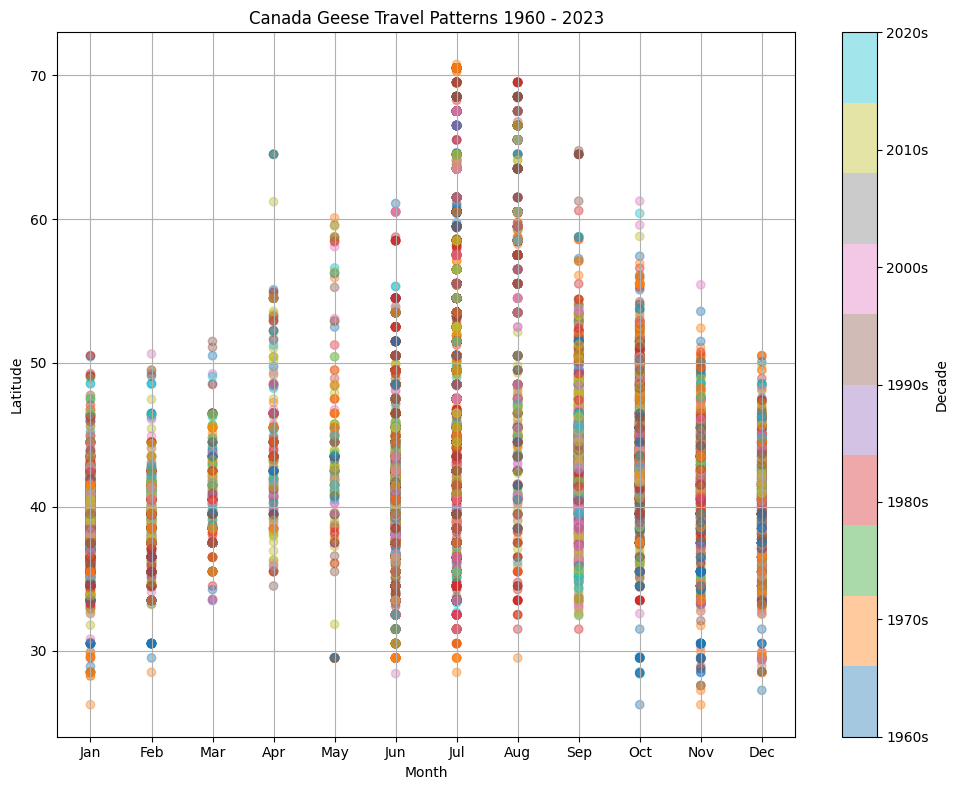

In [62]:
#sampled_geese = canada_geese_df[(canada_geese_df["EVENT_YEAR"] > 2010) & (canada_geese_df["EVENT_YEAR"] < 2024)]
sampled_geese = canada_geese_df
sampled_geese['DECADE'] = (sampled_geese['EVENT_YEAR'] // 10) * 10

sampled_geese = sampled_geese.sample(n=50000, random_state=33) #33 cause it's my favorite number

plt.figure(figsize=(10,8))
scatter =plt.scatter(
    x = sampled_geese['EVENT_MONTH'],
    y = sampled_geese['LAT_DD'],
    c = sampled_geese['DECADE'],
    cmap = 'tab10',
    alpha = 0.4,
)
plt.xlabel("Month")
plt.xticks(ticks=range(1,13), labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Latitude')
plt.title("Canada Geese Travel Patterns 1960 - 2023")
plt.grid(True)
plt.tight_layout()

cbar = plt.colorbar(scatter, ticks=sorted(sampled_geese['DECADE'].unique()))
cbar.set_label('Decade')
cbar.set_ticklabels(f"{d}s" for d in sorted(sampled_geese['DECADE'].unique()))

plt.show()

We can clearly see that each month from 50,000 sightings/captures of geese from 1960 to 2023, that the average latitude rises during the summer months of the northen hemisphere. Roughly from April to mid August the latitude rises. Showing a trend in Migration where geese travel north during summer and south during winter.

Next let's see if Canada Geese had a significant change in latitude as a function of the month in the last few decades.
### Hypothesis: The Average Latitude of Canada Geese Sighted between 1960 to 2023 Has Increased

Plan: make a line graph of each decade and see whether there is a significant rise in latitude using Z-test

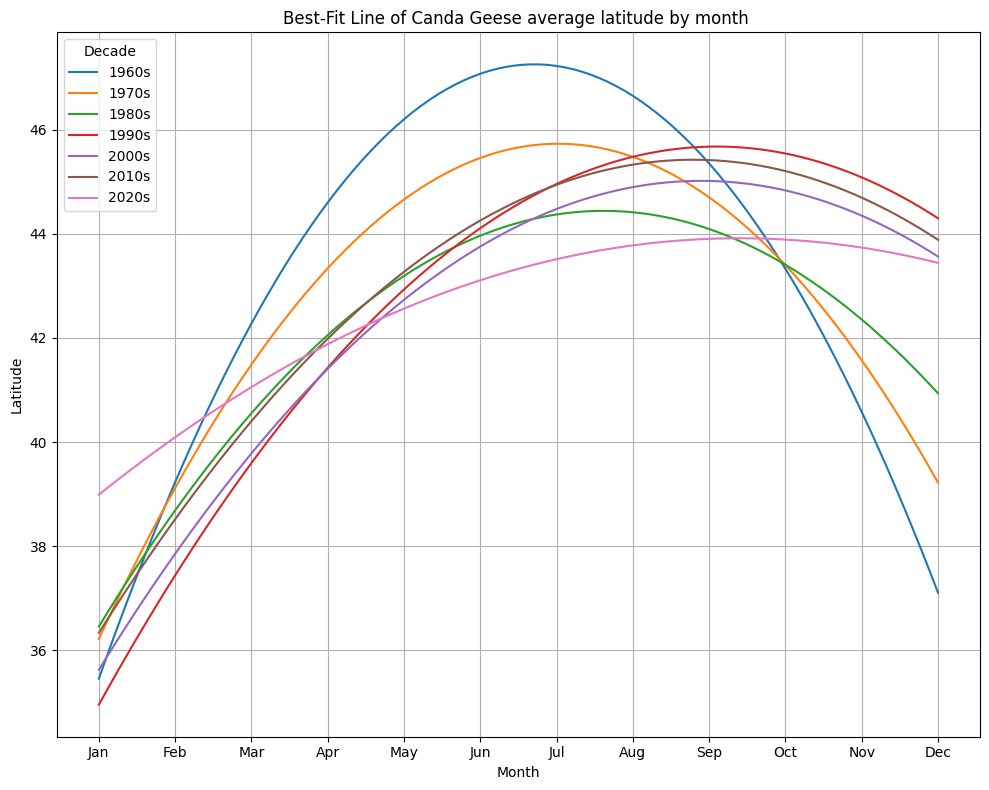

In [63]:
decades = sorted(sampled_geese['DECADE'].unique())

plt.figure(figsize=(10,8))

for decade in decades:
    decade_df= sampled_geese[sampled_geese['DECADE'] == decade]
    
    x = decade_df['EVENT_MONTH']
    y = decade_df['LAT_DD']

    coeffs = np.polyfit(x, y, deg=2)
    a, b, c = coeffs #since data seems parabolic use 2 degrees

    x_fit = np.linspace(1, 12, 100)
    y_fit = a * x_fit**2 + b * x_fit + c #equation for parabolic line graph

    plt.plot(x_fit, y_fit, label = f"{decade}s")

plt.xlabel("Month")
plt.xticks(ticks=range(1,13), labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel("Latitude")
plt.legend(title='Decade')

plt.title("Best-Fit Line of Canda Geese average latitude by month ")

plt.grid(True)
plt.tight_layout()
plt.show()

Based on this graph we can clearly see a trend where average latitudes where Canada Geese are sighted are decreasing, they are aswell seen peaking in latitude further into the year. near August, and September. But lets confirm this outcome using a Z-Test on the means of these decades during the month of July, the middle of summer.

### Z-TEST

In [64]:
july_1960s = sampled_geese[(sampled_geese['DECADE'] == 1960) & (sampled_geese['EVENT_MONTH'] == 7)]
#we're using 2010s since 2020 only has 3 documented years
july_2010s = sampled_geese[(sampled_geese['DECADE'] == 2010) & (sampled_geese['EVENT_MONTH'] == 7)]

mean_2010s = july_2010s['LAT_DD'].mean()

mean_1960s = july_1960s['LAT_DD'].mean()

print(f"2010s Mean: {mean_2010s}" )
print(f"1960s Mean: {mean_1960s}" )

std_1960s = july_1960s['LAT_DD'].std()
std_2010s = july_2010s['LAT_DD'].std()

print(f"2010s std: {std_2010s}" )
print(f"1960s std: {std_1960s}" )

z = (mean_1960s - mean_2010s) / np.sqrt(((std_1960s ** 2)/len(july_1960s)) + ((std_2010s ** 2) / len(july_2010s)))

p = 2 * (1 - norm.cdf(abs(z)))

print(f"z value: {z}")
print(f"P-value: {p}")




2010s Mean: 49.09502563774301
1960s Mean: 51.56024783783784
2010s std: 7.159403334688081
1960s std: 8.777683956124406
z value: 6.2727657708173
P-value: 3.546902771489613e-10
